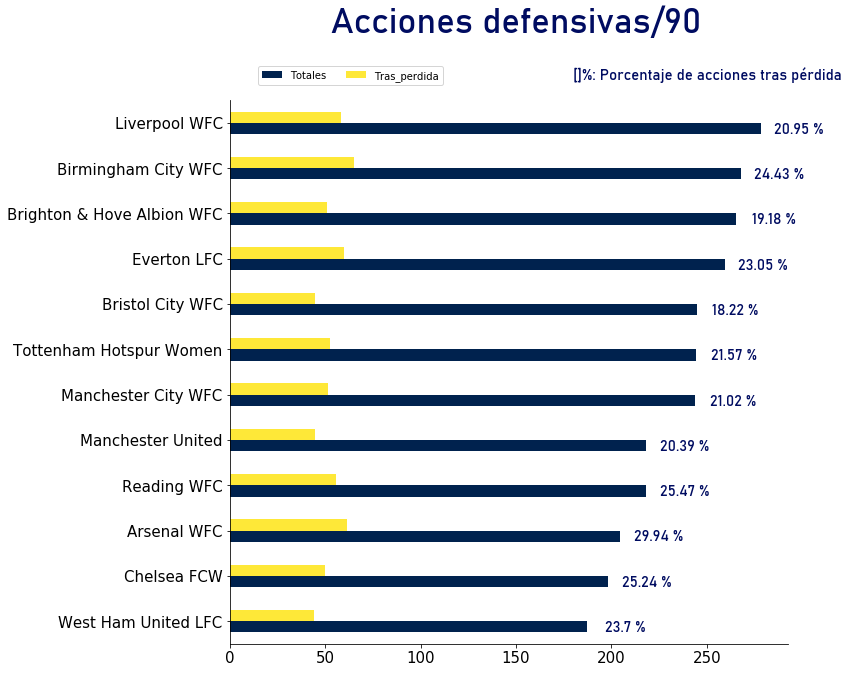

In [16]:
import pandas as pd
#carga de todos los partidos
dfpartidos=pd.read_json('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/37/42.json')
#separamos la columna home_team
sep=dfpartidos['home_team'].apply(pd.Series)
sep1=list(sep)
dfpartidos[sep1]=pd.DataFrame(dfpartidos.home_team.values.tolist(),index=dfpartidos.index)
    #separamos la columna away_team
sep=dfpartidos['away_team'].apply(pd.Series)
sep1=list(sep)
dfpartidos[sep1]=pd.DataFrame(dfpartidos.away_team.values.tolist(),index=dfpartidos.index)

listaporcentajes=[]
#lista con todos los equipos de la competición
equipos=dfpartidos.home_team_name.unique()

#bucle para cada equipo
for equipo in equipos:
    dfsoloequipo=dfpartidos.loc[(dfpartidos['home_team_name']==equipo) | (dfpartidos['away_team_name']==equipo)]
    listapartidos=dfsoloequipo['match_id'].tolist()
    #montamos el dataframe con todos los eventos
    filenames=[]
    for i in listapartidos:
        filenames.append(pd.read_json('https://raw.githubusercontent.com/gonzalo09002/open-data/81bb27062e43874a1bdb72be9d243e93a8212dbc/data/events/'+str(i)+'.json'))
        dfeventos = pd.concat(filenames, ignore_index=True,sort=True) 
    #separamos la columna team
    sep=dfeventos['team'].apply(pd.Series)
    sep1=list(sep)
    dfeventos[sep1]=pd.DataFrame(dfeventos.team.tolist(),index=dfeventos.index)
    #nos quedamos con los eventos propios propias
    dfeventos=dfeventos[(dfeventos['name']==equipo)]
    #df de acciones defensivas susceptibles de ser realizadas tras pérdida
    dfad=dfeventos.loc[(dfeventos['type']=={'id': 22, 'name': 'Foul Comitted'}) | (dfeventos['type']=={'id': 6, 'name': 'Block'}) | (dfeventos['type']=={'id': 39, 'name': 'Dribbled Past'}) | (dfeventos['type']=={'id': 4, 'name': 'Duel'}) | (dfeventos['type']=={'id': 17, 'name': 'Pressure'}) | (dfeventos['type']=={'id': 33, 'name': '50-50'})]
    totales=len(dfad)
    #contamos el número de acciones con counterpress, definimos las variables y las metemos en lista
    filastrasperdida = dfad.apply(lambda x: True if x['counterpress'] == True else False , axis=1)
    trasperdida = len(filastrasperdida[filastrasperdida == True].index)
    porcentaje=(trasperdida/totales)*100
    porcentaje=round(porcentaje,2)
    numpartidos=len(dfsoloequipo)
    a=(totales,trasperdida,porcentaje,numpartidos)
    listaporcentajes.append(a)

#trabajo con dataframe para representar
paragrafico=list(zip(equipos, listaporcentajes))
dfgrafico=pd.DataFrame(paragrafico, columns = ['Equipo' , 'Datos'])
dfgrafico[['Totales','Tras_perdida','Porcentaje','Partidos']] = pd.DataFrame(dfgrafico.Datos.values.tolist(), index= dfgrafico.index)
dfgrafico.drop(columns=['Datos'],inplace=True)

dfgrafico['Totales']=dfgrafico['Totales']/dfgrafico['Partidos']
dfgrafico['Tras_perdida']=dfgrafico['Tras_perdida']/dfgrafico['Partidos']
dfordenado=dfgrafico.sort_values(by='Totales',ascending=True)

#representación de los datos
ax = dfordenado.plot.barh(y=['Totales','Tras_perdida'],x='Equipo',figsize=(10,10),colormap='cividis')

ax.legend(loc=(0.05,1.0275),ncol=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

x_axis = ax.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax.axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

ax.tick_params(axis='both', labelsize=15)

ax.text(150,13, s = "Acciones defensivas/90", size = 35, color='#000C61', ha='center', family='bahnschrift')
ax.text(180,11.95, s = "[]%: Porcentaje de acciones tras pérdida", size = 15, color='#000C61', ha='left', family='bahnschrift')

for i in range(len(dfordenado)):
    ax.text(x=((dfordenado.iloc[i,1])+20),y=(i-0.23),s="{} %".format(dfordenado.iloc[i,3]),color='#000C61', ha='center', family='bahnschrift',size = 15)